In [13]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
### Load datasets
timestamps_proc_none = pd.read_csv("received-timestamps-proc-none.csv")
timestamps_proc_clksync = pd.read_csv("received-timestamps-proc-clksync.csv")
timestamps_proc_all = pd.read_csv("received-timestamps-proc-all.csv")

In [15]:
def extract_timestamps(data):
    return {
        "lsl_time_m1": data["Item1.Timestamp"],
        "lsl_time_m2": data["Item2.Timestamp"],
        "harp_time_m1": data["Item1.Value"],
        "harp_time_m2": data["Item2.Value"]
    }

dataset_proc_none = extract_timestamps(timestamps_proc_none)
dataset_proc_clksync = extract_timestamps(timestamps_proc_clksync)
dataset_proc_all = extract_timestamps(timestamps_proc_all)

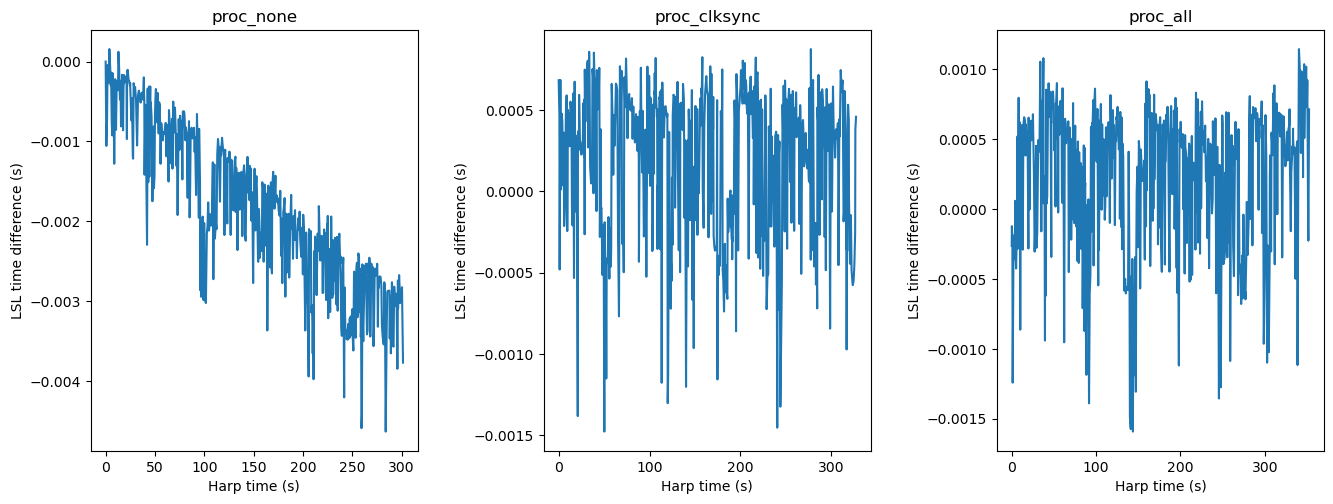

In [44]:
### Preview data
fig, axes = plt.subplots(1, 3)
fig.tight_layout()

plt.subplot(1, 3, 1)
plt.plot(dataset_proc_none["harp_time_m1"] - dataset_proc_none["harp_time_m1"][0], (dataset_proc_none["lsl_time_m1"] - dataset_proc_none["lsl_time_m2"]) - (dataset_proc_none["lsl_time_m1"] - dataset_proc_none["lsl_time_m2"])[0])
plt.xlabel("Harp time (s)")
plt.ylabel("LSL time difference (s)")
plt.title("proc_none")

plt.subplot(1, 3, 2)
plt.plot(dataset_proc_clksync["harp_time_m1"] - dataset_proc_clksync["harp_time_m1"][0], dataset_proc_clksync["lsl_time_m1"] - dataset_proc_clksync["lsl_time_m2"])
plt.xlabel("Harp time (s)")
plt.ylabel("LSL time difference (s)")
plt.title("proc_clksync")

plt.subplot(1, 3, 3)
plt.plot(dataset_proc_all["harp_time_m1"] - dataset_proc_all["harp_time_m1"][0], dataset_proc_all["lsl_time_m1"] - dataset_proc_all["lsl_time_m2"])
plt.xlabel("Harp time (s)")
plt.ylabel("LSL time difference (s)")
plt.title("proc_all")

plt.subplots_adjust(right=2)

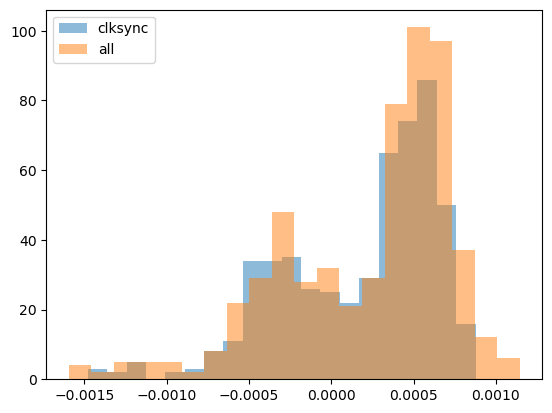

In [57]:
### Jitter distribution
plt.figure()
plt.hist(dataset_proc_clksync["lsl_time_m1"] - dataset_proc_clksync["lsl_time_m2"], bins=20, alpha=0.5, label='clksync')
plt.hist(dataset_proc_all["lsl_time_m1"] - dataset_proc_all["lsl_time_m2"], bins=20, alpha=0.5, label='all')
plt.legend(loc='upper left')